In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [2]:
tips = pd.read_csv('data/tips.csv')

In [3]:
tips.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [4]:
tips.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [5]:
renomear =  {
                'total_bill' : 'valor_da_conta', 
                'tip' : 'gorjeta', 
                'dessert' : 'sobremesa',
                'day' : 'dia_da_semana',
                'time' : 'hora_do_dia',
                'size' : 'total_de_pessoas'
            }

In [6]:
tips = tips.rename(mapper=renomear, axis=1)

In [7]:
tips.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [8]:
tips.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [9]:
dias = {'Sun' : 'Dom', 
        'Sat' : 'Sab',
        'Thur' : 'Qui',
        'Fri' : 'Sex'
}

In [10]:
tips.dia_da_semana = tips.dia_da_semana.map(dias)

In [11]:
tips.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [12]:
refeicoes = {
    'Dinner' : 'Janta',
    'Lunch' : 'Almoco'
}

In [13]:
tips.hora_do_dia = tips.hora_do_dia.map(refeicoes)

In [14]:
tips.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Dom,Janta,2
1,10.34,1.66,No,Dom,Janta,3
2,21.01,3.50,No,Dom,Janta,3
3,23.68,3.31,No,Dom,Janta,2
4,24.59,3.61,No,Dom,Janta,4


# Analise 1 - Valor da conta e gorgeta

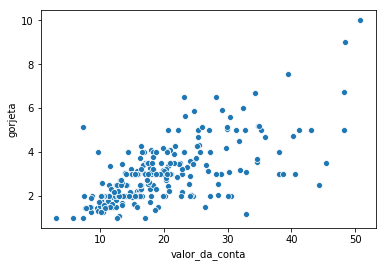

In [15]:
sns.scatterplot(data=tips, x='valor_da_conta', y='gorjeta')

In [16]:
# Visualmente o valor da gorjeta esta positivamente correlacioado com o valor da gorjeta

In [17]:
tips.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Dom,Janta,2
1,10.34,1.66,No,Dom,Janta,3
2,21.01,3.50,No,Dom,Janta,3
3,23.68,3.31,No,Dom,Janta,2
4,24.59,3.61,No,Dom,Janta,4


In [18]:
#criando a coluna porcentagem
tips['porcentagem'] = tips['gorjeta'] / tips['valor_da_conta']

In [19]:
tips.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,No,Dom,Janta,2,0.059447
1,10.34,1.66,No,Dom,Janta,3,0.160542
2,21.01,3.50,No,Dom,Janta,3,0.166587
3,23.68,3.31,No,Dom,Janta,2,0.139780
4,24.59,3.61,No,Dom,Janta,4,0.146808


In [20]:
tips.porcentagem = tips.porcentagem.round(2)

In [21]:
tips.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,No,Dom,Janta,2,0.06
1,10.34,1.66,No,Dom,Janta,3,0.16
2,21.01,3.50,No,Dom,Janta,3,0.17
3,23.68,3.31,No,Dom,Janta,2,0.14
4,24.59,3.61,No,Dom,Janta,4,0.15


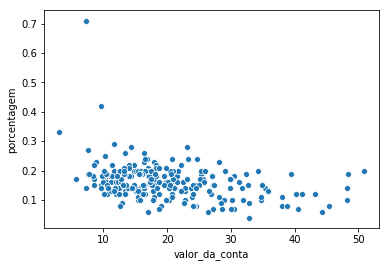

In [22]:
porcentagem_conta = sns.scatterplot(data=tips, x='valor_da_conta', y='porcentagem')

In [23]:
# porcentagem eh semi constante, quase caindo

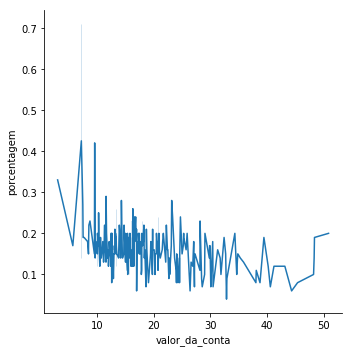

In [24]:
porcentagem_conta_linha = sns.relplot(data=tips, x='valor_da_conta', y='porcentagem', kind='line')

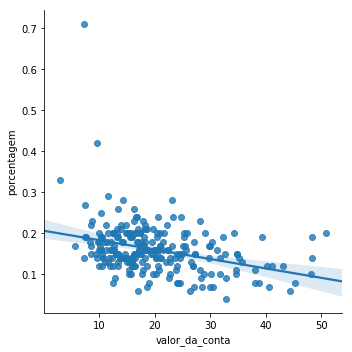

In [25]:
sns.lmplot(data=tips, x='valor_da_conta', y='porcentagem')

In [26]:
tips.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,No,Dom,Janta,2,0.06
1,10.34,1.66,No,Dom,Janta,3,0.16
2,21.01,3.50,No,Dom,Janta,3,0.17
3,23.68,3.31,No,Dom,Janta,2,0.14
4,24.59,3.61,No,Dom,Janta,4,0.15


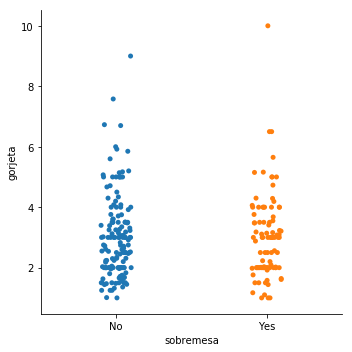

In [27]:
sns.catplot(data=tips, x='sobremesa', y='gorjeta')

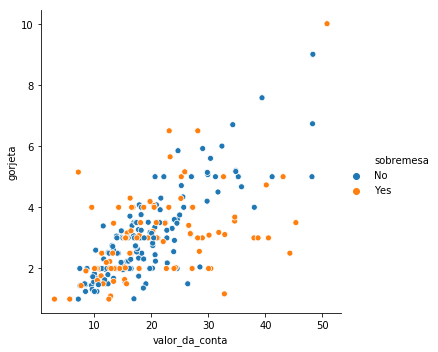

In [28]:
sns.relplot(data=tips, x='valor_da_conta', y='gorjeta', hue='sobremesa')

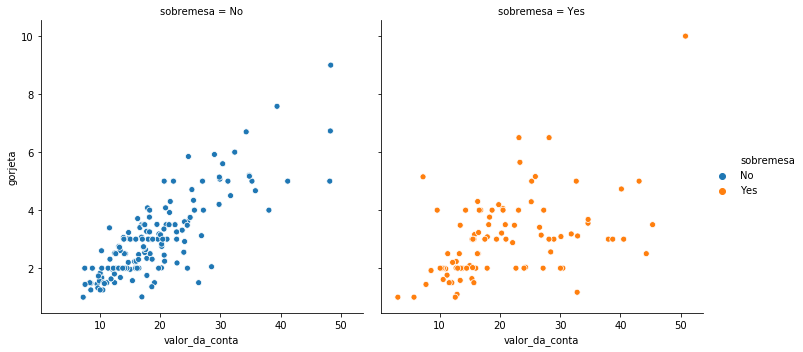

In [29]:
sns.relplot(data=tips, x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa')

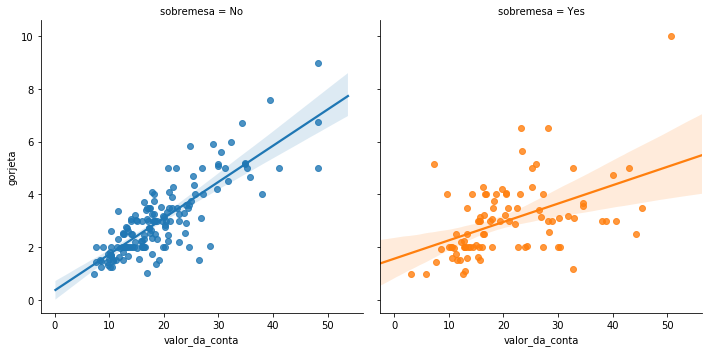

In [30]:
sns.lmplot(data=tips, x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa')

# Teste de hipotese

**H<sup>null</sup>**
> **A distribuicao da taxa da gorgeta eh igual nos 2 grupos**

**H<sup>alt</sup>**
> **A distribuicao da taxa da gorgeta eh diferente nos 2 grupos**

In [31]:
from scipy.stats import ranksums

In [32]:
tips.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [33]:
sobremesa = tips.query("sobremesa == 'Yes'").porcentagem
sobremesa.head()

56    0.08
58    0.16
60    0.16
61    0.14
62    0.18
Name: porcentagem, dtype: float64

In [34]:
sem_sobremesa = tips.query("sobremesa == 'No'").porcentagem
sem_sobremesa.head()

0    0.06
1    0.16
2    0.17
3    0.14
4    0.15
Name: porcentagem, dtype: float64

In [35]:
rank = ranksums(sobremesa, sem_sobremesa)

In [36]:
print(f"P value eh {rank.pvalue.round(2)}, se for menor que 0,05 aceitamos a alternativa")

P value eh 0.53, se for menor que 0,05 aceitamos a alternativa


In [37]:
tips.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas', 'porcentagem'],
      dtype='object')

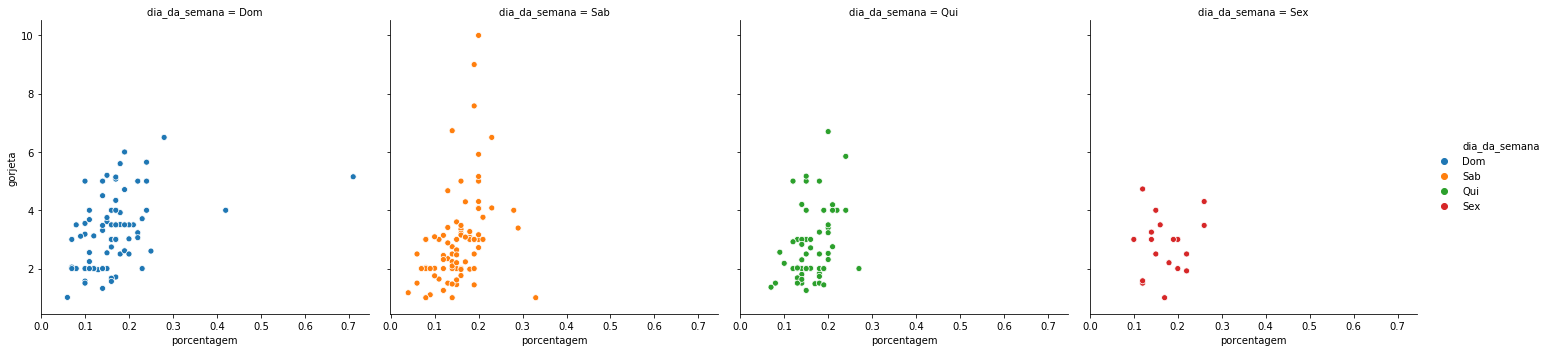

In [38]:
sns.relplot(data=tips, x='porcentagem', y='gorjeta', hue='dia_da_semana', col='dia_da_semana')

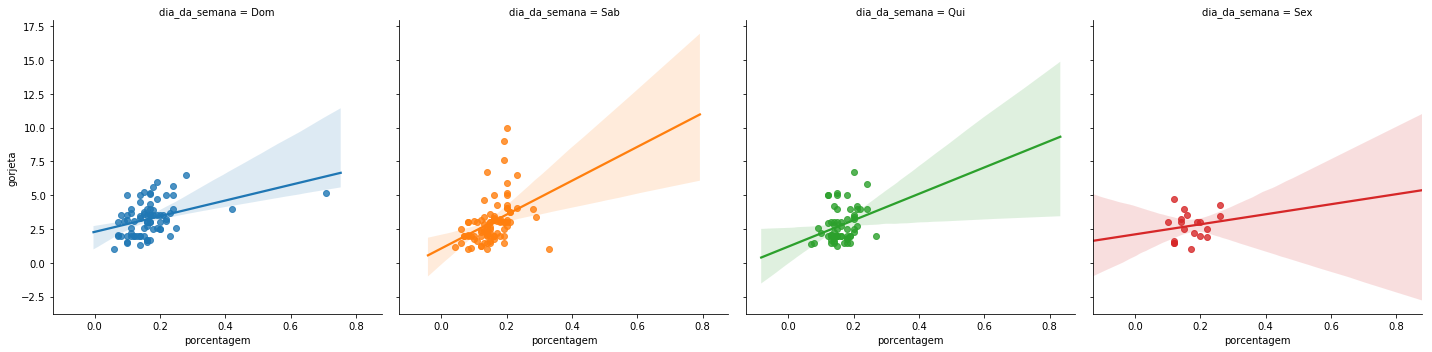

In [39]:
sns.lmplot(data=tips, x='porcentagem', y='gorjeta', hue='dia_da_semana', col='dia_da_semana')

In [40]:
media_tips = tips['gorjeta'].mean()

In [41]:
tips.groupby(['dia_da_semana']).mean()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
dia_da_semana,,,,
Dom,21.410000,3.255132,2.842105,0.166974
Qui,17.682742,2.771452,2.451613,0.161129
Sab,20.441379,2.993103,2.517241,0.153678
Sex,17.151579,2.734737,2.105263,0.169474


In [42]:
# ai ele fazia os teste de quem era difernete, acho

## Distplot boxplot violinplot

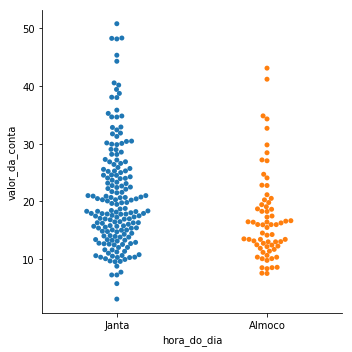

In [43]:
sns.catplot(data=tips, x='hora_do_dia', y='valor_da_conta', kind='swarm')

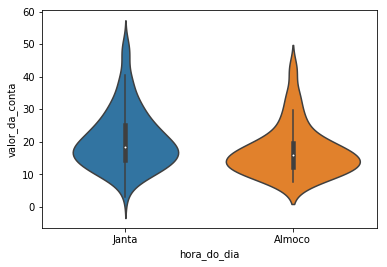

In [44]:
sns.violinplot(data=tips, x='hora_do_dia', y='valor_da_conta', kind='swarm')

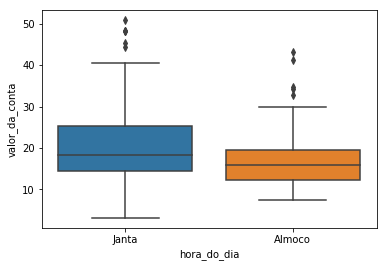

In [45]:
sns.boxplot(data=tips, x='hora_do_dia', y='valor_da_conta')

In [46]:
tips[tips['hora_do_dia'] == 'Almoco']
valor_almoco = tips.query("hora_do_dia == 'Almoco'")['valor_da_conta']

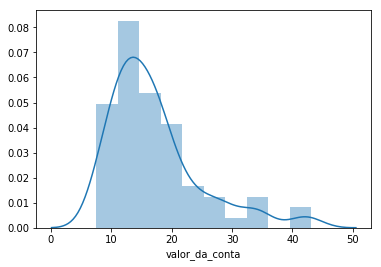

In [47]:
#histograma
sns.distplot(valor_almoco)

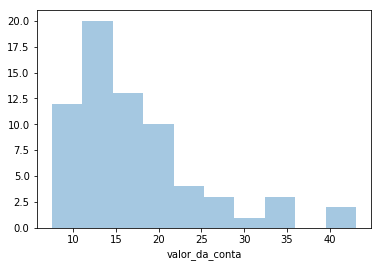

In [48]:
sns.distplot(valor_almoco, kde=False)